# Airline Passenger Satisfaction With Machine Learning

## Problem Statement
- Following the pandemic, the airline industry suffered a massive setback, with ICAO estimating a 371 billion dollar loss in 2020, and a 329 billion dollar loss with reduced seat capacity. As a result, in order to revitalise the industry in the face of the current recession, it is absolutely necessary to understand the customer pain points and improve their satisfaction with the services provided.

- This data set contains a survey on air passenger satisfaction survey.Need to predict Airline passenger satisfaction level:1.Satisfaction 2.Neutral or dissatisfied.

- Select the best predictive models for predicting passengers satisfaction.



![](https://i.imgur.com/plzmiDT.jpg)

## 1) Importing the necessary libraries 

In [7]:
import jovian
import pandas as pd
import numpy as np
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score
from tabulate import tabulate
%matplotlib inline



### 0 ) Downloading Dataset
We will use a wrapper to download the dataset at Kaggle using `opendatasets`. [Click here for more details](https://github.com/JovianML/opendatasets/blob/master/README.md#kaggle-credentials) But you will need to provide the account information on Kaggle to download data.

- First, you register an account on Kaggle if you haven't. 

- Second, you can get your API key on the account page. 

- Third, you come back to this notebook and fill in with the account information (Username&API key at Kaggle) to download **'Give Me Some Credit'** dataset when the input pop up

In [8]:
dataset_url ='https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction'
od.download(dataset_url)

Skipping, found downloaded files in ".\airline-passenger-satisfaction" (use force=True to force download)


In [9]:
train_df = pd.read_csv('airline-passenger-satisfaction/train.csv')
train_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [10]:
test_df = pd.read_csv('airline-passenger-satisfaction/test.csv')
test_df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


## 2) Why Machine Learning for this problem?
**Data-Driven Insights**: Machine learning enables data-driven decision-making in the airline industry. By analyzing historical passenger data, machine learning models can uncover hidden patterns and relationships that may not be apparent through traditional analysis methods.

**Improved Prediction Accuracy**: Machine learning models have the potential to significantly improve the accuracy of predicting passenger satisfaction. They can handle large and complex datasets, capturing nuanced interactions between various factors that contribute to passenger satisfaction or dissatisfaction.

**Comprehensive Analysis**: Machine learning models can consider a wide range of factors beyond just the obvious ones like flight duration or seat comfort. They can incorporate variables such as in-flight entertainment quality, cleanliness, food and drink options, and more, leading to a more comprehensive analysis.

**Early Detection of Issues**: Machine learning algorithms can help airlines detect potential issues that may lead to passenger dissatisfaction early in the process. For example, they can identify trends or patterns in passenger feedback or behavior that suggest emerging problems, allowing airlines to take corrective actions proactively.

**Personalized Service**: Machine learning can enable airlines to personalize their services to individual passengers. By analyzing historical preferences and behaviors, airlines can offer tailored recommendations, seat preferences, and amenities to enhance the passenger experience.

**Resource Optimization**: Machine learning can help airlines optimize their resources by predicting passenger satisfaction levels. This can be particularly useful for allocating resources efficiently, such as assigning staff to address specific passenger needs or adjusting in-flight services based on predicted passenger preferences.

## 3) Project Overview:

![](https://i.imgur.com/yyPB1G5.jpg)

In this project, we will explore the application of various powerful algorithms to solve problems in the realm of Machine Learning. The algorithms we will be working with are:

- Logistic Regression
- SVM
- KNN
- Decision Trees
- Random Forest
- LightGBM

Each of these algorithms possesses distinct characteristics and is suitable for different types of tasks. By using these algorithms, we aim to create predictive models that can learn patterns and relationships from the provided data.

Throughout the project, we will leverage essential evaluation tools, particularly the Confusion Matrix. The Confusion Matrix allows us to assess the performance of our models in terms of true positives, true negatives, false positives, and false negatives, providing valuable insights into their effectiveness.


## 4) What Is Machine Learning :

*According to Sir Arthur Samuel, Machine learning is a “Field of study that gives computers the ability to learn without being explicitly programmed"*.

![](https://images.unsplash.com/photo-1591453089816-0fbb971b454c?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MTB8fG1hY2hpbmUlMjBsZWFybmluZ3xlbnwwfHwwfHx8MA%3D%3D&auto=format&fit=crop&w=600&q=60)

## Key Concepts

- **Data-driven Approach:** Machine Learning relies on data to train models and make predictions. It enables computers to learn patterns and relationships within the data.

- **Training and Inference:** The process of developing a Machine Learning model involves training it on labeled data to learn from the patterns. Once trained, the model can make predictions on new, unseen data during inference.

- **Supervised Learning:** In supervised learning, the model is trained using labeled data, where each input example is paired with its corresponding output. The goal is to learn a mapping from inputs to outputs.

- **Unsupervised Learning:** In unsupervised learning, the model is trained on unlabeled data, and it must find patterns and structures within the data without explicit guidance.

- **Semi-Supervised Learning:** This approach combines both labeled and unlabeled data to train the model, often leveraging the unlabeled data to improve the model's performance.

- **Reinforcement Learning:** In reinforcement learning, the model learns from interactions with an environment, receiving rewards or penalties based on its actions.


## Machine Learning Workflow

1. **Data Collection:** Gather relevant data from various sources, such as databases, files, or APIs. Ensure that the data is representative and of sufficient quality for training the model.

2. **Data Preprocessing:** Clean and prepare the data for training. This involves handling missing values, scaling features, and encoding categorical variables.

3. **Train-Test Split:** Divide the data into training and testing sets. The training set is used to train the model, while the testing set evaluates the model's performance on unseen data.

4. **Model Selection:** Choose the appropriate Machine Learning algorithm based on the problem type and data characteristics. Common algorithms include Logistic Regression, Decision Trees, Random Forests, and XGBoost.

5. **Model Training:** Train the selected model using the training data. The model optimizes its internal parameters to minimize the prediction errors.

6. **Model Evaluation:** Evaluate the model's performance using various metrics, such as accuracy, precision, recall, F1-score, mean squared error, etc.

7. **Hyperparameter Tuning:** Fine-tune the model's hyperparameters to improve its performance. This step involves experimenting with different parameter values.

8. **Model Deployment:** Deploy the trained model to make predictions on new, real-world data. This often involves integrating the model into a larger software system or web application.


## Common Evaluation Metrics

- **Confusion Matrix:** A table that helps evaluate the performance of classification models by showing true positives, true negatives, false positives, and false negatives.We will be using this the most today.





## 5) Dataset Description

There is the following information about the passengers of some airline:

1. **Gender:** male or female
2. **Customer type:** regular or non-regular airline customer
3. **Age**: the actual age of the passenger
4. **Type of travel:** the purpose of the passenger's flight (personal or business travel)
5. **Class:** business, economy, economy plus
6. **Flight distance**
7. **Inflight wifi service:** satisfaction level with Wi-Fi service on board (0: not rated; 1-5)
8. **Departure/Arrival time convenient:** departure/arrival time satisfaction level (0: not rated; 1-5)
9. **Ease of Online booking:** online booking satisfaction rate (0: not rated; 1-5)
10. **Gate location:** level of satisfaction with the gate location (0: not rated; 1-5)
11. **Food and drink:** food and drink satisfaction level (0: not rated; 1-5)
12. **Online boarding:** satisfaction level with online boarding (0: not rated; 1-5)
13. **Seat comfort:** seat satisfaction level (0: not rated; 1-5)
14. Inflight entertainment: satisfaction with inflight entertainment (0: not rated; 1-5)
15. **On-board service:** level of satisfaction with on-board service (0: not rated; 1-5)
16. **Leg room service:** level of satisfaction with leg room service (0: not rated; 1-5)
17. **Baggage handling:** level of satisfaction with baggage handling (0: not rated; 1-5)
18. **Checkin service:** level of satisfaction with checkin service (0: not rated; 1-5)
19. **Inflight service:** level of satisfaction with inflight service (0: not rated; 1-5)
20. **Cleanliness:** level of satisfaction with cleanliness (0: not rated; 1-5)
21. **Departure delay in minutes:**
22. **Arrival delay in minutes:**
23. **Satisfaction:** Airline satisfaction level(Satisfaction, neutral or dissatisfaction).


## 6) Data Preprocessing

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

<Axes: >

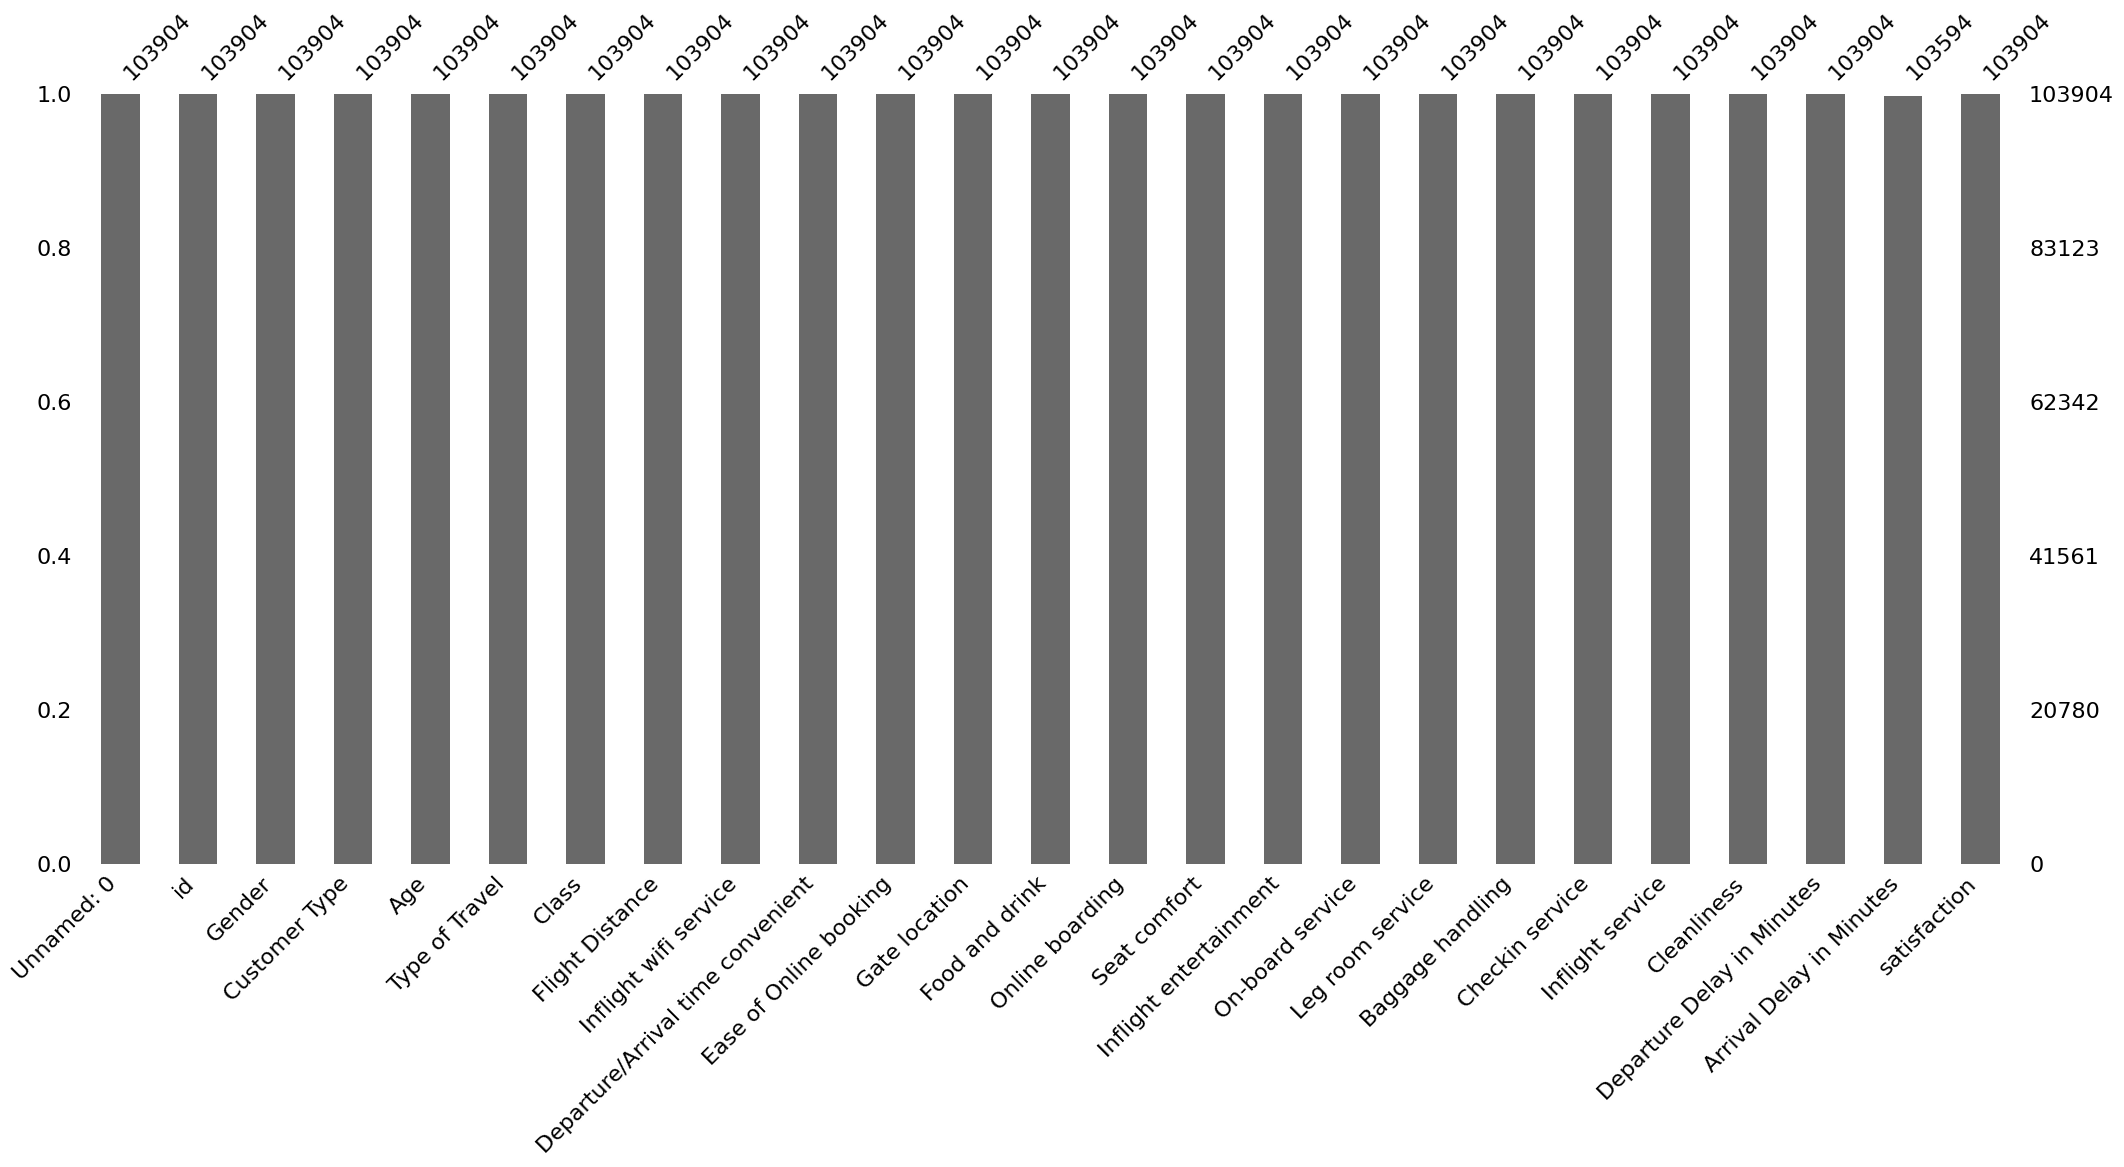

In [12]:
msno.bar(train_df)

In [13]:
train_df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [14]:
train_df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [15]:
data = [train_df,test_df]
for df in data:
    df.drop({'Unnamed: 0','id'},axis=1,inplace=True)

In [16]:
train_df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [17]:
test_df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

## 7) Training, Validation and Test Sets

While building real-world machine learning models, it is quite common to split the dataset into three parts:

1. **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using an optimization technique. 


2. **Validation set** - used to evaluate the model during training, tune model hyperparameters (optimization technique, regularization etc.), and pick the best version of the model. Picking a good validation set is essential for training models that generalize well. [Learn more here.](https://www.fast.ai/2017/11/13/validation-sets/)


3. **Test set** - used to compare different models or approaches and report the model's final accuracy. For many datasets, test sets are provided separately. The test set should reflect the kind of data the model will encounter in the real-world, as closely as feasible.


<img src="https://i.imgur.com/j8eITrK.png" width="480">


As a general rule of thumb you can use around 60% of the data for the training set, 20% for the validation set and 20% for the test set. If a separate test set is already provided, you can use a 75%-25% training-validation split.


When rows in the dataset have no inherent order, it's common practice to pick random subsets of rows for creating test and validation sets. This can be done using the `train_test_split` utility from `scikit-learn`. Learn more about it here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [18]:
train_df,val_df = train_test_split(train_df,test_size=0.33,random_state=42)

In [19]:
train_df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
83733,Male,disloyal Customer,48,Business travel,Business,1590,4,4,4,3,...,3,5,2,4,3,4,3,10,0.0,satisfied
67268,Male,Loyal Customer,8,Business travel,Eco Plus,569,4,1,1,1,...,4,2,1,1,3,5,4,0,0.0,satisfied
71351,Male,Loyal Customer,37,Business travel,Business,794,2,2,2,2,...,4,4,4,4,2,4,5,0,11.0,satisfied
75473,Female,Loyal Customer,38,Personal Travel,Eco,977,4,2,5,4,...,4,4,3,3,2,4,4,0,0.0,neutral or dissatisfied
40740,Female,disloyal Customer,48,Business travel,Eco,708,2,2,2,5,...,2,3,5,1,5,3,2,57,91.0,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54886,Male,disloyal Customer,39,Business travel,Eco,637,3,5,3,5,...,3,4,3,2,3,2,3,1,0.0,neutral or dissatisfied
76820,Male,Loyal Customer,17,Personal Travel,Eco,646,3,4,3,1,...,3,5,1,2,4,4,3,0,2.0,neutral or dissatisfied
103694,Male,Loyal Customer,46,Business travel,Eco,1197,1,2,2,2,...,4,3,3,3,1,1,1,260,263.0,neutral or dissatisfied
860,Female,Loyal Customer,37,Business travel,Eco,320,5,5,5,5,...,5,1,2,4,1,3,5,0,0.0,satisfied


In [20]:
val_df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
80638,Female,Loyal Customer,26,Personal Travel,Eco,861,2,4,2,5,...,5,5,4,4,3,5,5,0,0.0,neutral or dissatisfied
43398,Male,Loyal Customer,22,Business travel,Business,393,3,5,5,5,...,3,1,1,3,2,3,3,0,16.0,neutral or dissatisfied
32751,Female,Loyal Customer,59,Personal Travel,Eco,196,1,3,1,3,...,4,4,1,4,3,4,4,37,34.0,neutral or dissatisfied
33571,Female,Loyal Customer,32,Personal Travel,Eco,1020,2,3,2,4,...,4,3,2,4,1,4,4,27,4.0,neutral or dissatisfied
71287,Male,disloyal Customer,35,Business travel,Business,1117,2,2,2,1,...,2,2,2,3,2,2,2,0,0.0,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8372,Male,Loyal Customer,28,Personal Travel,Eco,280,1,5,1,4,...,1,3,4,5,5,5,1,0,0.0,neutral or dissatisfied
41540,Female,Loyal Customer,45,Personal Travel,Eco,2475,3,4,3,5,...,4,4,3,4,5,4,5,0,4.0,neutral or dissatisfied
36052,Female,Loyal Customer,50,Business travel,Eco Plus,826,4,1,1,1,...,5,5,4,5,2,5,3,0,0.0,satisfied
97050,Male,Loyal Customer,50,Business travel,Business,1550,1,1,5,1,...,4,4,4,4,4,4,3,56,78.0,satisfied


In [21]:
input_cols = train_df.columns[:-1]
input_cols

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [22]:
target_cols = 'satisfaction'

In [23]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_cols].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_cols].copy()

In [24]:
numerical_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes(include='object').columns.tolist()

In [25]:
numerical_cols

['Age',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [26]:
categorical_cols

['Gender', 'Customer Type', 'Type of Travel', 'Class']

In [27]:
train_inputs[categorical_cols].nunique()

Gender            2
Customer Type     2
Type of Travel    2
Class             3
dtype: int64

## 8) Imputing Missing Numeric Data

Machine learning models can't work with missing numerical data. The process of filling missing values is called imputation.

<img src="https://i.imgur.com/W7cfyOp.png" width="480">

There are several techniques for imputation, but we'll use the most basic one: replacing missing values with the average value in the column using the `SimpleImputer` class from `sklearn.impute`.

In [28]:
imputer = SimpleImputer(strategy='mean').fit(train_inputs[numerical_cols])
train_inputs[numerical_cols] = imputer.transform(train_inputs[numerical_cols])
val_inputs[numerical_cols] = imputer.transform(val_inputs[numerical_cols])

In [29]:
train_inputs[numerical_cols].isnull().sum()


Age                                  0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [30]:
val_inputs[numerical_cols].isnull().sum()

Age                                  0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

## 9) Scaling Numeric Features

Another good practice is to scale numeric features to a small range of values e.g. $(0,1)$ or $(-1,1)$. Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.

The numeric columns in our dataset have varying ranges.

In [31]:
scaler = MinMaxScaler().fit(train_inputs[numerical_cols])
train_inputs[numerical_cols] = scaler.transform(train_inputs[numerical_cols])
val_inputs[numerical_cols] = scaler.transform(val_inputs[numerical_cols])

In [32]:
train_inputs.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,69615.000000,69615.000000,69615.000000,69615.000000,69615.000000,69615.000000,69615.000000,69615.000000,69615.000000,69615.000000,69615.000000,69615.000000,69615.000000,69615.000000,69615.000000,69615.000000,69615.000000,69615.000000
mean,0.414648,0.234128,0.545276,0.611538,0.550643,0.494197,0.640322,0.648935,0.687498,0.670919,0.676912,0.670712,0.657746,0.660832,0.728159,0.656514,0.009315,0.009576
std,0.193815,0.201549,0.265364,0.305655,0.279491,0.318671,0.265426,0.269915,0.263754,0.266047,0.257511,0.262887,0.295299,0.253152,0.234930,0.262022,0.023998,0.024364
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.256410,0.077141,0.400000,0.400000,0.400000,0.250000,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.500000,0.600000,0.600000,0.400000,0.000000,0.000000
50%,0.423077,0.163974,0.600000,0.600000,0.600000,0.500000,0.600000,0.600000,0.800000,0.800000,0.800000,0.800000,0.750000,0.600000,0.800000,0.600000,0.000000,0.000000
75%,0.564103,0.345921,0.800000,0.800000,0.800000,0.750000,0.800000,0.800000,1.000000,0.800000,0.800000,0.800000,1.000000,0.800000,1.000000,0.800000,0.007538,0.008207
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
val_inputs.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,34289.000000,34289.000000,34289.000000,34289.000000,34289.000000,34289.000000,34289.000000,34289.000000,34289.000000,34289.000000,34289.000000,34289.000000,34289.000000,34289.000000,34289.000000,34289.000000,34289.000000,34289.000000
mean,0.416091,0.233546,0.547278,0.613118,0.552877,0.494269,0.640637,0.652390,0.688652,0.673079,0.675581,0.669194,0.658389,0.660912,0.727936,0.658806,0.009289,0.009595
std,0.193713,0.200985,0.265974,0.303713,0.280381,0.320895,0.266883,0.269864,0.263948,0.267711,0.257996,0.263596,0.295080,0.252935,0.235546,0.263328,0.024048,0.024456
min,0.000000,0.000000,0.000000,0.000000,0.000000,-0.250000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000
25%,0.256410,0.077342,0.400000,0.400000,0.400000,0.250000,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.500000,0.600000,0.600000,0.400000,0.000000,0.000000
50%,0.423077,0.163974,0.600000,0.600000,0.600000,0.500000,0.600000,0.600000,0.800000,0.800000,0.800000,0.800000,0.750000,0.600000,0.800000,0.600000,0.000000,0.000000
75%,0.564103,0.344911,0.800000,0.800000,0.800000,0.750000,0.800000,0.800000,1.000000,0.800000,0.800000,0.800000,1.000000,0.800000,1.000000,0.800000,0.007538,0.008207
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.614322,0.612374


## 10) Encoding Categorical Data

Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns.

<img src="https://i.imgur.com/n8GuiOO.png" width="640">

One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column. 

In [34]:
#OneHotEncoding categorical columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(train_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

# Transform categorical columns
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])

c:\Users\yeagr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [35]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
encoded_cols

['Gender_Female',
 'Gender_Male',
 'Customer Type_Loyal Customer',
 'Customer Type_disloyal Customer',
 'Type of Travel_Business travel',
 'Type of Travel_Personal Travel',
 'Class_Business',
 'Class_Eco',
 'Class_Eco Plus']

In [36]:
unique_labels = test_df['satisfaction'].unique()
unique_labels

array(['satisfied', 'neutral or dissatisfied'], dtype=object)

In [37]:
train_inputs['satisfaction'] = train_targets.map({'neutral or dissatisfied': 0, 'satisfied': 1})
val_inputs['satisfaction'] = val_targets.map({'neutral or dissatisfied': 0, 'satisfied': 1})

In [38]:
train_inputs['satisfaction'].value_counts()

0    39545
1    30070
Name: satisfaction, dtype: int64

In [39]:
val_inputs['satisfaction'].value_counts()

0    19334
1    14955
Name: satisfaction, dtype: int64

In [40]:
X_train = train_inputs[numerical_cols+encoded_cols]
y_train = train_inputs['satisfaction']

X_val = val_inputs[numerical_cols+encoded_cols]
y_val = val_inputs['satisfaction']

## 11) Logistic Regression
Logistic Regression is a supervised machine learning algorithm which is mainly used for classification tasks where the goal is to predict the probability that an instance belongs to a certain class.It's referred as regression because it takes the output of LinearRegression function as input and uses a sigmoid function to estimate the probability for a given class.
The sigmoid function is a mathematical function used to map the predicted values to probabilities.In LogisticRegression instead of fitting a straight line,we fit an `S` shaped logistic function,which predicts two values i.e 0 or 1.

- we take linear combination (or weighted sum of the input features) 
- we apply the sigmoid function to the result to obtain a number between 0 and 1
- this number represents the probability of the input being classified as "Yes"
- instead of RMSE, the cross entropy loss function is used to evaluate the results


Here's a visual summary of how a logistic regression model is structured ([source](http://datahacker.rs/005-pytorch-logistic-regression-in-pytorch/)):


<img src="https://i.imgur.com/YMaMo5D.png" width="480">

The sigmoid function applied to the linear combination of inputs has the following formula:

<img src="https://i.imgur.com/sAVwvZP.png" width="400">

To train a logistic regression model, we can use the `LogisticRegression` class from Scikit-learn.

In [41]:
# Create a LogisticRegression Model
model = LogisticRegression(solver='liblinear')

# Fit the model on the training data
model.fit(X_train,y_train)

# Predict on training and validation sets
train_preds = model.predict(X_train)
val_preds = model.predict(X_val)

# Calculate training and validation accuracy
train_accuracy = accuracy_score(y_train,train_preds)
val_accuracy = accuracy_score(y_val,val_preds)

# Find F1,Recall,Precision Scores for validation set
f1 = f1_score(y_val,val_preds)
recall = recall_score(y_val,val_preds)
precision = precision_score(y_val,val_preds)

results = {
    'Metric': ['Train Accuracy', 'Validation Accuracy', 'F1 Score', 'Recall', 'Precision'],
    'Value': [train_accuracy, val_accuracy, f1, recall, precision]
}

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

print(tabulate(results_df, headers='keys', tablefmt='pretty', showindex=False))


+---------------------+--------------------+
|       Metric        |       Value        |
+---------------------+--------------------+
|   Train Accuracy    | 0.8749120160884867 |
| Validation Accuracy | 0.8754411035609088 |
|      F1 Score       | 0.854266898693145  |
|       Recall        | 0.8370444667335339 |
|      Precision      | 0.8722129319955407 |
+---------------------+--------------------+


The F1,Recall,Precision scores are looking good but this can also be due to overfittinghis.We can visualize the breakdown of correctly and incorrectly classified inputs using a confusion matrix.

<img src="https://i.imgur.com/UM28BCN.png" width="480">

In [42]:
# Helper Function to Predict and Plot Confusion Matrix
def predict_and_plot(inputs, targets, model, name=''):
    """
    Predicts using the model, calculates accuracy, plots a confusion matrix, and returns predictions.
    
    Args:
        inputs (array-like): Input data for prediction.
        targets (array-like): True target values.
        model (object): The trained machine learning model.
        name (str): Optional name or label for the model.
        
    Returns:
        preds (array-like): Predicted target values.
    """
    # Make predictions using the provided model
    preds = model.predict(inputs)
    
    # Calculate and display accuracy
    accuracy = accuracy_score(targets, preds)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    # Generate and plot the confusion matrix
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('Confusion Matrix')
    
    # Return the predicted values
    return preds


Accuracy: 87.49%


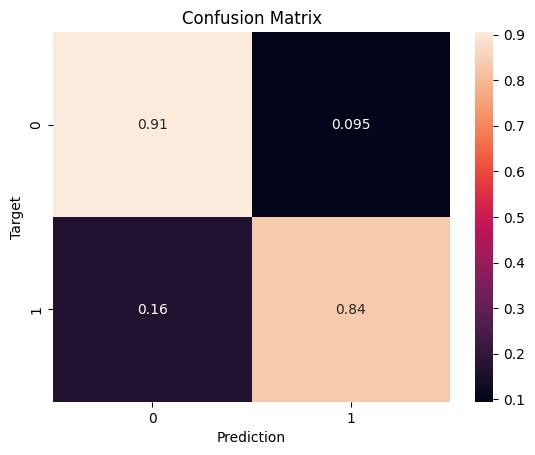

In [43]:
training = predict_and_plot(X_train,y_train,model,'LogisticRegression')

Accuracy: 87.54%


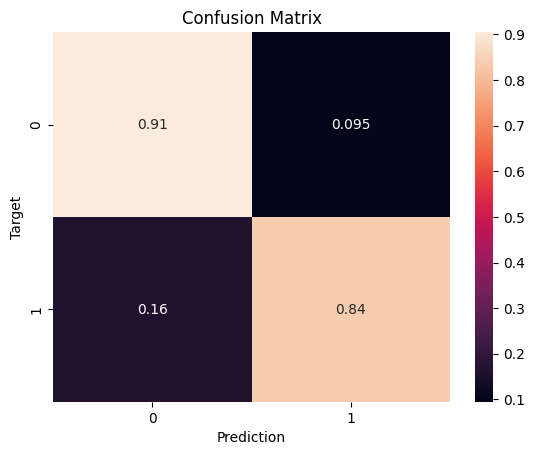

In [44]:
validation = predict_and_plot(X_val,y_val,model,'LogisticRegression')

The validation accuracy is around 87.54% this suggests that our model generalizes okay on the data it hasn't seen before.But a question may arise how good is 87.54% accuracy? To tackle this let's create a random model that will guess randomly.

In [46]:
def random_inputs(num_samples):
    return np.random.randint(2,size=num_samples)
random_preds = random_inputs(len(X_val))
random_accuracy = accuracy_score(y_val,random_preds)
print(f"Random Model Accuracy: {random_accuracy * 100:.2f}%")

Random Model Accuracy: 50.14%


Thankfully, our model is better than a "random" model! 

## 12) Linear Support Vector Classification


Linear Support Vector Classification, often abbreviated as LinearSVC, is a machine learning model used for binary classification tasks. It is a simplified variant of the Support Vector Machine (SVM) algorithm, specialized for scenarios where the goal is to separate data into two distinct classes.

Key Characteristics of LinearSVC:

    - Linear Separation: LinearSVC focuses on finding a linear decision boundary, represented as a hyperplane, that separates the data into two classes. The decision boundary is constructed in such a way that it maximizes the margin between the classes while minimizing classification errors.

   - Margin Maximization: The "margin" is the distance between the hyperplane and the nearest data points from each class. LinearSVC aims to find the hyperplane that maximizes this margin. A larger margin generally indicates a more robust and less overfitting model.

    - Classification: LinearSVC is primarily used for binary classification tasks, where the goal is to assign data points to one of two classes based on their features or attributes.

    - Linear Features: LinearSVC assumes that the data is linearly separable, meaning that a straight line can effectively separate the two classes in feature space. It does not employ complex non-linear transformations or kernel tricks.

    - Computational Efficiency: One of the advantages of LinearSVC is its computational efficiency. It is well-suited for large datasets and scenarios where you need quick model training and prediction.

 

![](https://ml-cheatsheet.readthedocs.io/en/latest/_images/svm.png)  
 

In [51]:
# Create a LinearSVC Model 
model = LinearSVC()

# Fit the model on the training data 
model.fit(X_train,y_train)

# Predict on training and validation sets
train_preds = model.predict(X_train)
val_preds = model.predict(X_val)

# Calculate training and validation accuracy
train_accuracy = accuracy_score(y_train,train_preds)
val_accuracy = accuracy_score(y_val,val_preds)

# Find F1,Recall,Precision Scores
f1 =  f1_score(y_val,val_preds)
recall = recall_score(y_val,val_preds)
precision = precision_score(y_val,val_preds)

results = {
    'Metric': ['Train Accuracy', 'Validation Accuracy', 'F1 Score', 'Recall', 'Precision'],
    'Value': [train_accuracy, val_accuracy, f1, recall, precision]
}

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

print(tabulate(results_df, headers='keys', tablefmt='pretty', showindex=False))



c:\Users\yeagr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


+---------------------+--------------------+
|       Metric        |       Value        |
+---------------------+--------------------+
|   Train Accuracy    | 0.873805932629462  |
| Validation Accuracy | 0.8746245151506314 |
|      F1 Score       | 0.8529804042269417 |
|       Recall        | 0.833901705115346  |
|      Precision      | 0.8729525409491811 |
+---------------------+--------------------+


Accuracy: 87.38%


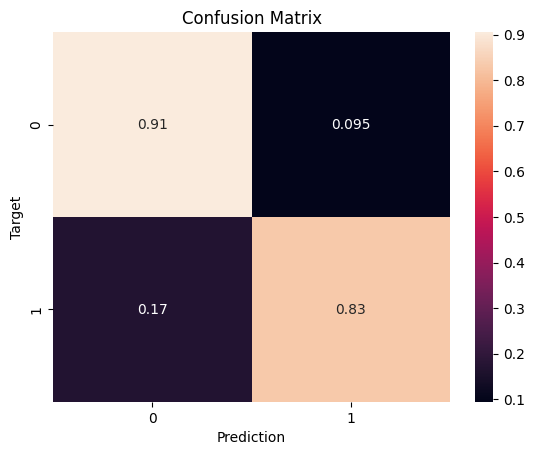

In [52]:
training = predict_and_plot(X_train,y_train,model,'LinearSVC')

Accuracy: 87.46%


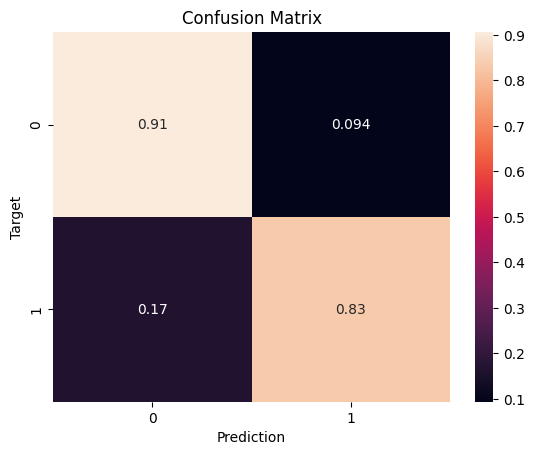

In [53]:
Validation = predict_and_plot(X_val,y_val,model,'LinearSVC')

## 13) K Nearest Neighbors(KNN)
K-Nearest Neighbors is a simple yet powerful supervised machine learning algorith used for both classification and regression tasks.It's considered a non-parametric and instance based learning algorithm.KNN makes predictions by finding K data points in the training set that are closest to to a new input data point and using their labels or values to make predictions.

![](https://i.imgur.com/1C1Uhnr.png)

1) **Training Phase** - During the training phase,KNN memerizes the entire training dataset.This means that KNN doesn't learn explicit parameters or create a model in traditional sense.It stores the training data as-is.
2) **Prediction Phase** - Given a new input data,KNN identifies the K closest data points from the training set based on a distance metric.The distance can be calculated using different methods,but Euclidean distance is commonly used.It measures the straight line distance b/w two points in a multi-dimensional space.Once the K nearest neighbors are identified, the algorithm looks at their class labels. For classification, the majority class among these K neighbors becomes the predicted class for the new input point.
3) **Choosing the Value of K** - The optimal value of K can depend on the nature of the data and the problem at hand. It's typically chosen using techniques like cross-validation.



In [54]:
# K Nearest Neighbors
X_train = np.ascontiguousarray(X_train)
X_val = np.ascontiguousarray(X_val)
model = KNeighborsClassifier()
model.fit(X_train,y_train)
train_preds = model.predict(X_train)
val_preds = model.predict(X_val)
train_accuracy = accuracy_score(y_train,train_preds)
val_accuracy = accuracy_score(y_val,val_preds)
f1 = f1_score(y_val,val_preds)
precision = precision_score(y_val,val_preds)
recall = recall_score(y_val,val_preds)

results = {
    'Metric': ['Train Accuracy', 'Validation Accuracy', 'F1 Score', 'Recall', 'Precision'],
    'Value': [train_accuracy, val_accuracy, f1, recall, precision]
}

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

print(tabulate(results_df, headers='keys', tablefmt='pretty', showindex=False))


+---------------------+--------------------+
|       Metric        |       Value        |
+---------------------+--------------------+
|   Train Accuracy    | 0.9469367234073116 |
| Validation Accuracy | 0.9258946017673306 |
|      F1 Score       | 0.9115158268621374 |
|       Recall        | 0.8751588097626212 |
|      Precision      | 0.9510245603836651 |
+---------------------+--------------------+


Accuracy: 94.69%


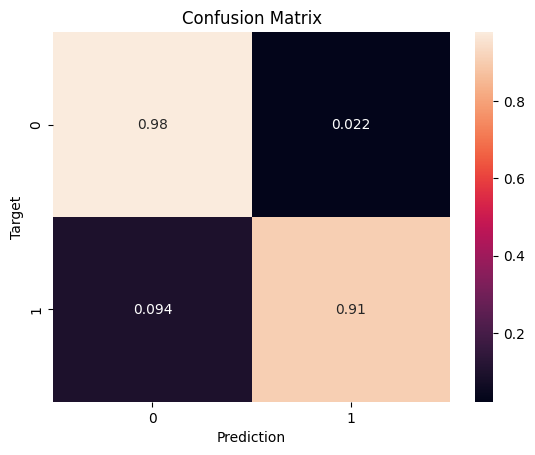

In [56]:
training = predict_and_plot(X_train,y_train,model,'KNN')

Accuracy: 92.59%


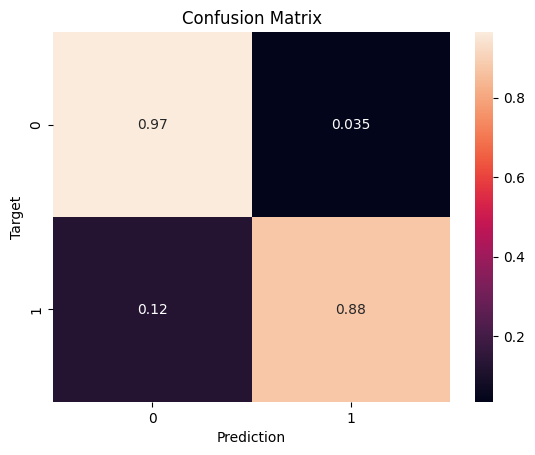

In [57]:
validation = predict_and_plot(X_val,y_val,model,'KNN')

## 14) Decision Trees
![](https://miro.medium.com/v2/resize:fit:1358/1*66sc9FlgC3C8Bv7wg5YxmA.png)




**Quote**
>“The 'knowledge' learned by a decision tree through training is directly formulated into a hierarchical structure. This structure holds and displays the knowledge in such a way that it can easily be understood, even by non-experts.”




Decision trees are supervised machine learning algorithms that solve classification and regression problems. A decision tree is constructed by learning a sequence of **If-Else conditions** about individual features to divide the training data into subsets and eventually infer the label. One of the significant differences from linear models is that tree-based models can capture non-linear relationships between features and labels. In addition, input features to be on the same scale through standardization is unnecessary.




- **Node** : A node is a point that involves either a question or a prediction. Those questions are if-else statements in order to split data till the end where a decision tree made predictions for the label.

- **Root** : The root is an initial node at which the tree starts growing. The root node has no parent node, and it involves a question that generates two children nodes through two branches. 

- **Internal Node**: An internal node is a node that not only has a parent, but also gives rise to two children nodes.

- **Leaf** : A leaf is a node that has one parent node but no children node involving no questions. It's where a prediction for an entry is made. The ultimate goal of a decision tree is to produce the purest leaves.

- **max_depth**: In a decision tree, the parameter controls the maximum number of branches to be separated the top (root nodes)from an extreme-end (the leaf). It's a parameter for the `DescirionTreeClassifer()` estimator. It means the number of times for a decision model to split data. The above diagram splits the entire dataset twice so that the `max_depth` is equal to 2. 



In [62]:
trees = DecisionTreeClassifier(random_state=42)
trees.fit(X_train,y_train)
train_preds = trees.predict(X_train)
val_preds = trees.predict(X_val)
train_accuracy = accuracy_score(y_train,train_preds)
val_accuracy = accuracy_score(y_val,val_preds)
f1 = f1_score(y_val,val_preds)
precision = precision_score(y_val,val_preds)
recall = recall_score(y_val,val_preds)

results = {
    'Metric': ['Train Accuracy', 'Validation Accuracy', 'F1 Score', 'Recall', 'Precision'],
    'Value': [train_accuracy, val_accuracy, f1, recall, precision]
}

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

print(tabulate(results_df, headers='keys', tablefmt='pretty', showindex=False))

+---------------------+--------------------+
|       Metric        |       Value        |
+---------------------+--------------------+
|   Train Accuracy    |        1.0         |
| Validation Accuracy | 0.9460468371781038 |
|      F1 Score       | 0.9381643157965105 |
|       Recall        | 0.9384152457372117 |
|      Precision      | 0.9379135200160396 |
+---------------------+--------------------+


In [63]:
pd.value_counts(train_preds)

0    39545
1    30070
dtype: int64

In [65]:
trees.tree_.max_depth

34

.max_depth() is 34 that means the classifier splitted the entire dataset 34 times to produce a leaf(prediction)

Accuracy: 100.00%


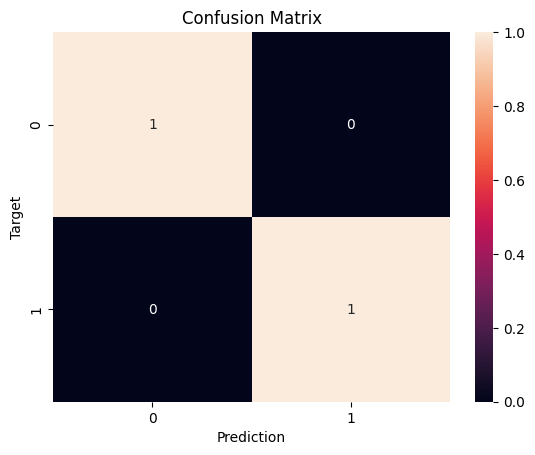

In [70]:
training = predict_and_plot(X_train,y_train,trees,'Decision Trees')

Accuracy: 94.60%


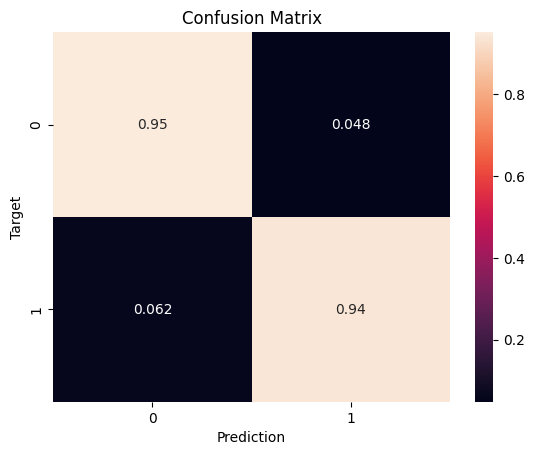

In [69]:
validation = predict_and_plot(X_val,y_val,trees,'Decision Trees')

## 15) Random Forest Classifier
Random Forest Classifier is Ensemble algorithm. Random forest classifier creates a set of decision trees from randomly selected subset of training set. It then aggregates the votes from different decision trees to decide the final class of the test object.  

This works well because a single decision tree may be prone to a noise, but aggregate of many decision trees reduce the effect of noise giving more accurate results. 

![](https://1.cms.s81c.com/sites/default/files/2020-12-07/Random%20Forest%20Diagram.jpg) 


Random forest algorithms have three main hyperparameters, which need to be set before training. These include node size, the number of trees, and the number of features sampled. From there, the random forest classifier can be used to solve for regression or classification problems. 
- The random forest algorithm is made up of a collection of decision trees, and each tree in the ensemble is comprised of a data sample drawn from a training set with replacement, called the bootstrap sample. 
- Of that training sample, one-third of it is set aside as test data, known as the out-of-bag (oob) sample. 
- Another instance of randomness is then injected through feature bagging, adding more diversity to the dataset and reducing the correlation among decision trees. 
- Depending on the type of problem, the determination of the prediction will vary. For a regression task, the individual decision trees will be averaged, and for a classification task, a majority vote—i.e. the most frequent categorical variable—will yield the predicted class. 
- Finally, the oob sample is then used for cross-validation, finalizing that prediction.

In [71]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)
train_preds = model.predict(X_train)
val_preds = model.predict(X_val)

train_accuracy = accuracy_score(y_train,train_preds)
val_accuracy = accuracy_score(y_val,val_preds)

f1 = f1_score(y_val,val_preds)
recall = recall_score(y_val,val_preds)
precision = precision_score(y_val,val_preds)

results = {
    'Metric': ['Train Accuracy', 'Validation Accuracy', 'F1 Score', 'Recall', 'Precision'],
    'Value': [train_accuracy, val_accuracy, f1, recall, precision]
}

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

print(tabulate(results_df, headers='keys', tablefmt='pretty', showindex=False))

+---------------------+--------------------+
|       Metric        |       Value        |
+---------------------+--------------------+
|   Train Accuracy    |        1.0         |
| Validation Accuracy | 0.9629910466913587 |
|      F1 Score       | 0.9568587455379909 |
|       Recall        | 0.9410230692076229 |
|      Precision      | 0.9732365145228216 |
+---------------------+--------------------+


Accuracy: 100.00%


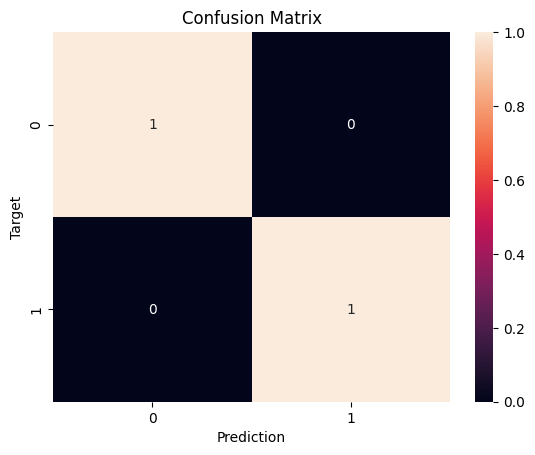

In [72]:
training = predict_and_plot(X_train,y_train,model,'RandomForest')

Accuracy: 96.30%


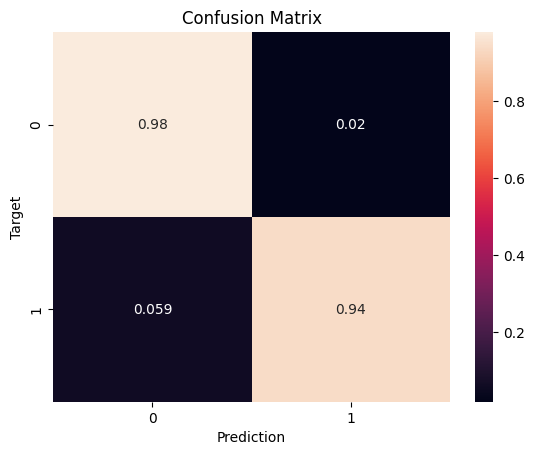

In [73]:
validation = predict_and_plot(X_val,y_val,model,'RandomForest')

I am performing HyperParameter and tuning on this randomforest model as the scores are quite promising if we leave training accuracy,by this doing the maybe we can take care of overfitting as shown in training accuracy and we can improve our scores of the random forest

In [57]:
# Create a RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Define the parameters for random search
param_dist = {
    'n_estimators': sp_randint(50, 500),
    'max_depth': sp_randint(3, 20),
    'min_samples_split': sp_randint(2, 20),
    'min_samples_leaf': sp_randint(1, 20),
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    rf_model,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    verbose=2,
    random_state=42  # Set a specific random seed for reproducibility
)

# Fit the randomized search to your data
random_search.fit(X_train, y_train)

# Access the best parameters and the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Make predictions and evaluate the best model
y_pred_val = best_model.predict(X_val)
validation_accuracy = accuracy_score(y_val, y_pred_val)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=9, min_samples_leaf=15, min_samples_split=12, n_estimators=121; total time=  14.6s
[CV] END max_depth=9, min_samples_leaf=15, min_samples_split=12, n_estimators=121; total time=  15.5s
[CV] END max_depth=9, min_samples_leaf=15, min_samples_split=12, n_estimators=121; total time=  19.0s
[CV] END max_depth=9, min_samples_leaf=15, min_samples_split=12, n_estimators=121; total time=  13.6s
[CV] END max_depth=9, min_samples_leaf=15, min_samples_split=12, n_estimators=121; total time=  13.7s
[CV] END max_depth=9, min_samples_leaf=19, min_samples_split=12, n_estimators=137; total time=  15.7s
[CV] END max_depth=9, min_samples_leaf=19, min_samples_split=12, n_estimators=137; total time=  15.4s
[CV] END max_depth=9, min_samples_leaf=19, min_samples_split=12, n_estimators=137; total time=  15.6s
[CV] END max_depth=9, min_samples_leaf=19, min_samples_split=12, n_estimators=137; total time=  15.6s
[CV] END max_depth=9

In [60]:
# Make predictions on the training data using the best model
y_pred_train = best_model.predict(X_train)

# Calculate the training accuracy
training_accuracy = accuracy_score(y_train, y_pred_train)

# Make predictions on the validation data using the best model
y_pred_val = best_model.predict(X_val)

# Calculate the validation accuracy
validation_accuracy = accuracy_score(y_val, y_pred_val)

# Calculate the F1 score for training and validation data
f1_train = f1_score(y_train, y_pred_train)
f1_val = f1_score(y_val, y_pred_val)

# Calculate the recall for training and validation data
recall_train = recall_score(y_train, y_pred_train)
recall_val = recall_score(y_val, y_pred_val)

# Calculate the precision for training and validation data
precision_train = precision_score(y_train, y_pred_train)
precision_val = precision_score(y_val, y_pred_val)

# Print the results
print("Training Accuracy:", training_accuracy)
print("Validation Accuracy:", validation_accuracy)
print("Training F1 Score:", f1_train)
print("Validation F1 Score:", f1_val)
print("Training Recall:", recall_train)
print("Validation Recall:", recall_val)
print("Training Precision:", precision_train)
print("Validation Precision:", precision_val)


Training Accuracy: 0.9696760755584285
Validation Accuracy: 0.9605996092041179
Training F1 Score: 0.9643622858107538
Validation F1 Score: 0.9541738746989586
Training Recall: 0.9498503491852345
Validation Recall: 0.9404881310598462
Training Precision: 0.9793245328304474
Validation Precision: 0.9682638028362935


Well would you look at that the scores are quite good,we even took care of overfitting.Now thats why i like hyperparameter and tuning.Let's work on LightGBM as well

## 16) LightGBM Ensemble
Light Gradient Boosted Machine, or LightGBM for short, is an open-source library that provides an efficient and effective implementation of the gradient boosting algorithm.

LightGBM extends the gradient boosting algorithm by adding a type of automatic feature selection as well as focusing on boosting examples with larger gradients. This can result in a dramatic speedup of training and improved predictive performance.

As such, LightGBM has become a de facto algorithm for machine learning competitions when working with tabular data for regression and classification predictive modeling tasks. As such, it owns a share of the blame for the increased popularity and wider adoption of gradient boosting methods in general, along with Extreme Gradient Boosting (XGBoost).

The algorithm starts by creating a single decision tree that predicts the target variable based on the input featuress.It then iteratively adds more decision trees to the model,with each tree attempting to correct the errors of the previous tree.
Lightgbm employes gradient boosting to repeatedly increase the performance of its decision trees.The approach adds a new tree to the modle at each iteration that corrects the flaws of the prior trees.
![](https://miro.medium.com/v2/resize:fit:1400/1*mKkwlQF25Rq1ilne5UiEXA.png)

In [79]:
model = lgb.LGBMClassifier()
model.fit(X_train,y_train)
train_preds = model.predict(X_train)
val_preds = model.predict(X_val)
train_accuracy = accuracy_score(y_train,train_preds)
val_accuracy = accuracy_score(y_val,val_preds)
f1 = f1_score(y_val,val_preds)
recall = recall_score(y_val,val_preds)
precision = precision_score(y_val,val_preds)

results = {
    'Metric': ['Train Accuracy', 'Validation Accuracy', 'F1 Score', 'Recall', 'Precision'],
    'Value': [train_accuracy, val_accuracy, f1, recall, precision]
}

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

print(tabulate(results_df, headers='keys', tablefmt='pretty', showindex=False))

[LightGBM] [Info] Number of positive: 30070, number of negative: 39545
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013889 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 940
[LightGBM] [Info] Number of data points in the train set: 69615, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.431947 -> initscore=-0.273911
[LightGBM] [Info] Start training from score -0.273911
+---------------------+--------------------+
|       Metric        |       Value        |
+---------------------+--------------------+
|   Train Accuracy    | 0.9677799324858148 |
| Validation Accuracy | 0.9635743241272712 |
|      F1 Score       | 0.9574953207418752 |
|       Recall        | 0.9406887328652624 |
|      Precision      | 0.9749133749133749 |
+---------------------+--------------------+


## 17) Hyperparameter and tuning of LightGBM

In [83]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

# Create a RandomForestClassifier
lg_model = lgb.LGBMClassifier()

# Define the parameters for random search
param_dist = {
    'n_estimators': sp_randint(50, 500),
    'max_depth': sp_randint(3, 20),
    'min_samples_split': sp_randint(2, 20),
    'min_samples_leaf': sp_randint(1, 20),
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    lg_model,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    verbose=2,
    random_state=42  # Set a specific random seed for reproducibility
)

# Fit the randomized search to your data
random_search.fit(X_train, y_train)

# Access the best parameters and the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Make predictions and evaluate the best model
y_pred_val = best_model.predict(X_val)
validation_accuracy = accuracy_score(y_val, y_pred_val)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=15. Current value: min_data_in_leaf=15
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=15. Current value: min_data_in_leaf=15
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 24056, number of negative: 31636
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013879 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bi

In [85]:
print('Best Parameters:', best_params)
print('Validation Accuracy:', validation_accuracy)


Best Parameters: {'max_depth': 19, 'min_samples_leaf': 17, 'min_samples_split': 3, 'n_estimators': 179}
Validation Accuracy: 0.9645658957683222


In [86]:
# Make predictions on the training data using the best model
y_pred_train = best_model.predict(X_train)

# Calculate the training accuracy
training_accuracy = accuracy_score(y_train, y_pred_train)

# Make predictions on the validation data using the best model
y_pred_val = best_model.predict(X_val)

# Calculate the validation accuracy
validation_accuracy = accuracy_score(y_val, y_pred_val)

# Calculate the F1 score for training and validation data
f1_train = f1_score(y_train, y_pred_train)
f1_val = f1_score(y_val, y_pred_val)

# Calculate the recall for training and validation data
recall_train = recall_score(y_train, y_pred_train)
recall_val = recall_score(y_val, y_pred_val)

# Calculate the precision for training and validation data
precision_train = precision_score(y_train, y_pred_train)
precision_val = precision_score(y_val, y_pred_val)

# Print the results
print("Training Accuracy:", training_accuracy)
print("Validation Accuracy:", validation_accuracy)
print("Training F1 Score:", f1_train)
print("Validation F1 Score:", f1_val)
print("Training Recall:", recall_train)
print("Validation Recall:", recall_val)
print("Training Precision:", precision_train)
print("Validation Precision:", precision_val)


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=17. Current value: min_data_in_leaf=17
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=17. Current value: min_data_in_leaf=17
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Training Accuracy: 0.9737269266681031
Validation Accuracy: 0.9645658957683222
Training F1 Score: 0.969156309549908
Validation F1 Score: 0.9587001597606989
Training Recall: 0.9556035916195543
Validation Recall: 0.9429622199933133
Training Precision: 0.9830989770433474
Validation Precision: 0.9749723451327433


In [92]:
lgbm_feature_importance = model.feature_importances_
feature_names = numerical_cols + encoded_cols

lgbm_feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': lgbm_feature_importance
}).sort_values('Importance', ascending=True)

lgbm_feature_importances_df


,Feature,Importance
19,Gender_Male,1
26,Class_Eco Plus,4
23,Type of Travel_Personal Travel,6
21,Customer Type_disloyal Customer,6
18,Gender_Female,9
25,Class_Eco,12
6,Food and drink,34
16,Departure Delay in Minutes,49
4,Ease of Online booking,63
3,Departure/Arrival time convenient,64


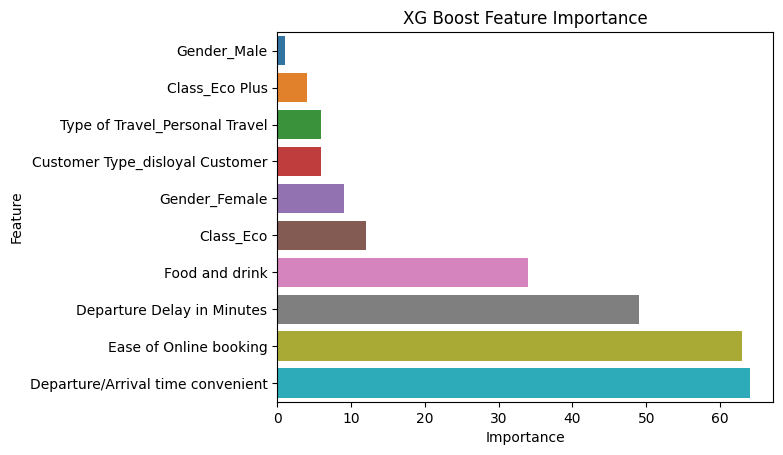

In [95]:
plt.title('XG Boost Feature Importance')
sns.barplot(data=lgbm_feature_importances_df.head(10), x='Importance', y='Feature');

## 18) Checking model accuracy on Test data

In [75]:
test_df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [76]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_cols].copy()

In [77]:
#Identify which columns are numerical and which columns are categorical
numerical_cols = test_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = test_inputs.select_dtypes('object').columns.tolist()

In [78]:
imputer = SimpleImputer(strategy='mean').fit(test_inputs[numerical_cols])
test_inputs[numerical_cols] = imputer.transform(test_inputs[numerical_cols])

In [79]:
test_inputs[numerical_cols].isna().sum()

Age                                  0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [80]:
#Scaling numerical features
scaler = MinMaxScaler()
scaler.fit(test_inputs[numerical_cols])
test_inputs[numerical_cols] = scaler.transform(test_inputs[numerical_cols])

In [81]:
#OneHotEncoding categorical columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(test_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

# Transform categorical columns
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

c:\Users\yeagr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [82]:
test_inputs['satisfaction'] = test_targets.map({'neutral or dissatisfied': 0, 'satisfied': 1})

In [83]:
X_test = test_inputs[numerical_cols + encoded_cols]
y_test= test_df["satisfaction"]

In [86]:
# Convert string labels to numerical values for y_true
label_mapping = {'neutral or dissatisfied': 0, 'satisfied': 1}
y_true_numeric = y_test.map(label_mapping)

# Compute predictions
pred_test = best_model.predict(X_test)

# Compute accuracy
test_accuracy = accuracy_score(y_true_numeric, pred_test)

print("Test Accuracy:", test_accuracy)


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=17. Current value: min_data_in_leaf=17
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Test Accuracy: 0.9630813058207576


The test accuracy is really good,this means not only our model generalizes well on training data but also perform well when given the data it has never seen before.

## 19) Saving the model using Joblib

In [88]:
import joblib
# Save the trained model to a file
joblib.dump(best_model, 'trained_model.joblib')

['trained_model.joblib']

## Summary 
- The goal of the project is to build a model to find out The  Airline passenger satisfaction level:neutral or dissatisfaction', 'satisfaction'
- I have performed data analysis, data preprocessing, and data modelling with multiple machine learning models to achieve this. I have also extensively tuned the hyperparameters of XG Boost and Light Boost Models to achieve higher recall and F1-Score.
- The model is performing very good with the test data too.
- This project has been a great exercise for me to understand the concepts of machine learning. There are so many limitations with this model as the model is built only on the features that are provided in the dataset.
There is always an improvement when it comes to Machine Learning models. Thus, with limited resources and time I have developed a reasonable model. With more research and more time, the performance of the model can be improved.


**References:**
- Jovian: https://jovian.com/learn/machine-learning-foundations
- Kaggle: https://www.kaggle.com/c/DontGetKicked/data
- Pandas: https://pandas.pydata.org/docs/
- Plotly: https://plotly.com/python/
- Sklearn: https://scikit-learn.org/stable/
- How to Develop a Light Gradient Boosted Machine (LightGBM) Ensemble: https://machinelearningmastery.com/light-gradient-boosted-machine-lightgbm-ensemble/

**Future Work:**
- Building a recommendation system
- Working on regression problems
- Using unsupervised learning